<a href="https://colab.research.google.com/github/AlvarezLI/ProyectoDSII_ParteI/blob/main/Pre_Entrega_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis Exploratorio de Datos - Proyecto de Clasificación del Clima**



**1. Introducción**

En este notebook, realizaremos un análisis exploratorio de datos utilizando un dataset sintético de clima para practicar técnicas de clasificación de Machine Learning. El objetivo principal es explorar las relaciones entre diferentes variables meteorológicas y predecir el tipo de clima utilizando diversos algoritmos de clasificación.

**1.1 Contexto del Dataset**

Este dataset ha sido generado sintéticamente para emular datos meteorológicos. Contiene información sobre varias características del clima, incluyendo temperatura, humedad, velocidad del viento, precipitación, cobertura de nubes, presión atmosférica, índice UV, estación del año, visibilidad y tipo de ubicación donde se tomaron las mediciones. El dataset clasifica el clima en cuatro tipos: Rainy (Lluvioso), Sunny (Soleado), Cloudy (Nublado), y Snowy (Nevado).

El objetivo de este análisis es investigar cómo estas variables meteorológicas afectan al tipo de clima, ofreciendo una práctica para aplicar técnicas de clasificación, preprocesamiento de datos, y detección de outliers.

Adjunto link del Dataset:

https://www.kaggle.com/datasets/nikhil7280/weather-type-classification


**1.2 Objetivo**

El objetivo de este trabajo es predecir el tipo de clima (Rainy, Sunny, Cloudy, Snowy) basándose en las características meteorológicas proporcionadas. Este análisis ayudará a entender cuáles son las variables más influyentes en la predicción del clima, proporcionando un caso práctico para la aplicación de algoritmos de aprendizaje automático.

**1.3 Contexto Analítico**

El conjunto de datos analizado contiene múltiples registros con variables tanto numéricas como categóricas. La variable de destino u objetivo es la columna denominada "Weather Type", que acepta los valores "Rainy", "Sunny", "Cloudy", o "Snowy". Las variables del conjunto de datos abarcan diferentes aspectos del clima, como:

Variables Numéricas:

- Temperature: Temperatura en grados Celsius.
- Humidity: Porcentaje de humedad.
- Wind Speed: Velocidad del viento en km/h.
- Precipitation (%): Porcentaje de precipitación.
- Atmospheric Pressure: Presión atmosférica en hPa.
- UV Index: Índice UV.
- Visibility (km): Visibilidad en kilómetros.

Variables Categóricas:

- Cloud Cover: Descripción de la cobertura de nubes.
- Season: Estación del año durante la cual se registraron los datos.
- Location: Tipo de ubicación donde se registraron los datos.

El análisis de este dataset es relevante para comprender cómo las condiciones meteorológicas se pueden clasificar en diferentes tipos de clima. A pesar de ser un dataset sintético, permite practicar con técnicas de manejo de outliers, preprocesamiento y modelado, siendo especialmente útil para estudiantes y profesionales que deseen aprender o afinar sus habilidades en ciencia de datos.

**1.4 Abstracto**

El análisis de datos meteorológicos es fundamental para diversas aplicaciones prácticas que afectan la vida cotidiana y la planificación estratégica en múltiples sectores.

En este estudio, nos enfocamos en un dataset de condiciones climáticas que incluye variables críticas como Temperatura, Precipitación, Índice UV, Visibilidad y Presión Atmosférica, con el objetivo de clasificar los tipos de clima en categorías precisas: Nublado, Lluvioso, Nevado y Soleado.

**1.5 Motivación**

La motivación detrás de este análisis radica en la creciente necesidad de herramientas predictivas que permitan a las organizaciones y a los individuos tomar decisiones informadas basadas en condiciones climáticas.

En un mundo donde el clima impacta en la agricultura, el turismo, la gestión de desastres y la planificación urbana, contar con un modelo predictivo preciso puede significar una ventaja significativa. Al entender mejor cómo las variables meteorológicas se relacionan con los diferentes tipos de clima, podemos mejorar la precisión de las predicciones y proporcionar información valiosa para la toma de decisiones.


**1.6 Audiencia**

Este análisis beneficiará a una amplia audiencia, incluyendo:

- Profesionales de la Meteorología: Para optimizar las predicciones climáticas y proporcionar datos más precisos a los usuarios.
- Planificadores Urbanos y Agrícolas: Para diseñar estrategias de manejo y adaptación basadas en las condiciones climáticas esperadas.
- Organizaciones de Gestión de Desastres: Para prever y mitigar los impactos de eventos climáticos extremos.
- Empresas del Sector Turístico: Para ajustar sus ofertas y estrategias en función de las condiciones climáticas esperadas.
- Investigadores en Ciencias Ambientales: Para apoyar investigaciones sobre el impacto del clima en diversos ecosistemas y actividades humanas.

Al proporcionar un análisis detallado y modelos predictivos precisos, buscamos contribuir a una mejor comprensión y manejo de las condiciones climáticas, facilitando la planificación y toma de decisiones en varios ámbitos.



**1.7 Hipótesis y Preguntas Guía**

- ¿Existe una relación significativa entre la humedad y el tipo de clima?
- ¿Cómo afecta la estación del año a la clasificación del tipo de clima?
- ¿En qué medida el tipo de ubicación altera la influencia de las variables meteorológicas en la predicción del clima?


In [83]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

**2. Exploración y preparación de Datos**

En esta sección, realizaremos una inspección inicial de los datos, verificando la existencia de valores nulos, outliers, y cualquier inconsistencia en los tipos de datos.

In [27]:
df = pd.read_csv('weather_classification_data.csv')

# Verificación de valores nulos en el dataset.
valores_perdidos = df.isnull().sum()

print("Valores perdidos en cada columna:")
print(valores_perdidos)

Valores perdidos en cada columna:
Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [84]:
#En esta instancia, corroboramos el tipo de dato para ser mas eficientes en los análisis.
print("Tipos de datos en cada columna:")
print(df.dtypes)

Tipos de datos en cada columna:
Temperature              float64
Humidity                   int64
Wind Speed               float64
Precipitation (%)        float64
Cloud Cover             category
Atmospheric Pressure     float64
UV Index                   int64
Season                  category
Visibility (km)          float64
Location                category
Weather Type            category
dtype: object


In [85]:
# Convertimos columnas categóricas a tipo 'category'.
df['Cloud Cover'] = df['Cloud Cover'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Weather Type'] = df['Weather Type'].astype('category')

# Verificamos los tipos de datos después de la conversión.
print("Tipos de datos después de la conversión:")
print(df.dtypes)

# Revisamos que existan valores únicos en columnas categóricas para detectar posibles inconsistencias.
print("\nValores únicos en 'Cloud Cover':", df['Cloud Cover'].unique())
print("Valores únicos en 'Season':", df['Season'].unique())
print("Valores únicos en 'Location':", df['Location'].unique())
print("Valores únicos en 'Weather Type':", df['Weather Type'].unique())

Tipos de datos después de la conversión:
Temperature              float64
Humidity                   int64
Wind Speed               float64
Precipitation (%)        float64
Cloud Cover             category
Atmospheric Pressure     float64
UV Index                   int64
Season                  category
Visibility (km)          float64
Location                category
Weather Type            category
dtype: object

Valores únicos en 'Cloud Cover': ['partly cloudy', 'clear', 'overcast', 'cloudy']
Categories (4, object): ['clear', 'cloudy', 'overcast', 'partly cloudy']
Valores únicos en 'Season': ['Winter', 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']
Valores únicos en 'Location': ['inland', 'mountain', 'coastal']
Categories (3, object): ['coastal', 'inland', 'mountain']
Valores únicos en 'Weather Type': ['Rainy', 'Cloudy', 'Sunny', 'Snowy']
Categories (4, object): ['Cloudy', 'Rainy', 'Snowy', 'Sunny']


In [86]:
# Verificamos los valores únicos en la columna 'Humidity' para confirmar los outliers
print(df['Humidity'].unique())

# Filtramos los registros con valores de humedad válidos (0% <= Humidity <= 100%)
df_filtrado = df[(df['Humidity'] >= 0) & (df['Humidity'] <= 100)]

# Verificamos el número de registros después de filtrar
print("Cantidad de registros después de eliminar valores de humedad superiores al 100%:", len(df_filtrado))

# Guardamos el dataframe filtrado
df_filtrado.to_csv('weather_classification_data_filtrado.csv', index=False)

[ 73  96  64  83  74  55  97  85  45  43  59  87  21  50  27  51  46 102
  67  88  36  79  72  57  61  70  95  69  90 105  49  37  22  54  66  25
  91  98  94  41  84  63  75  52  89  47  81  62  31  68  35  78  56  93
  44  38  24  82  65  80  39  48  60  29  99  92  76  77  86  32  58  42
  30 100  33  71 107 108  26 106  28 109 101  34 103  40  23 104  53  20]
Cantidad de registros después de eliminar valores de humedad superiores al 100%: 12784


In [87]:

# Seleccionamos las columnas numéricas del DataFrame filtrado
columnas_numericas = df_filtrado.select_dtypes(include=['float64', 'int64']).columns

# Calculamos Q1, Q3 e IQR para las columnas numéricas del DataFrame filtrado
Q1 = df_filtrado[columnas_numericas].quantile(0.25)
Q3 = df_filtrado[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtramos registros que no son outliers
df_sin_outliers = df_filtrado[~((df_filtrado[columnas_numericas] < (Q1 - 1.5 * IQR)) | (df_filtrado[columnas_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificamos la cantidad de registros después de eliminar outliers
print("Cantidad de registros después de eliminar outliers:", len(df_sin_outliers))

# Guardamos el DataFrame sin outliers
df_sin_outliers.to_csv('weather_classification_data_sin_outliers.csv', index=False)

Cantidad de registros después de eliminar outliers: 11289


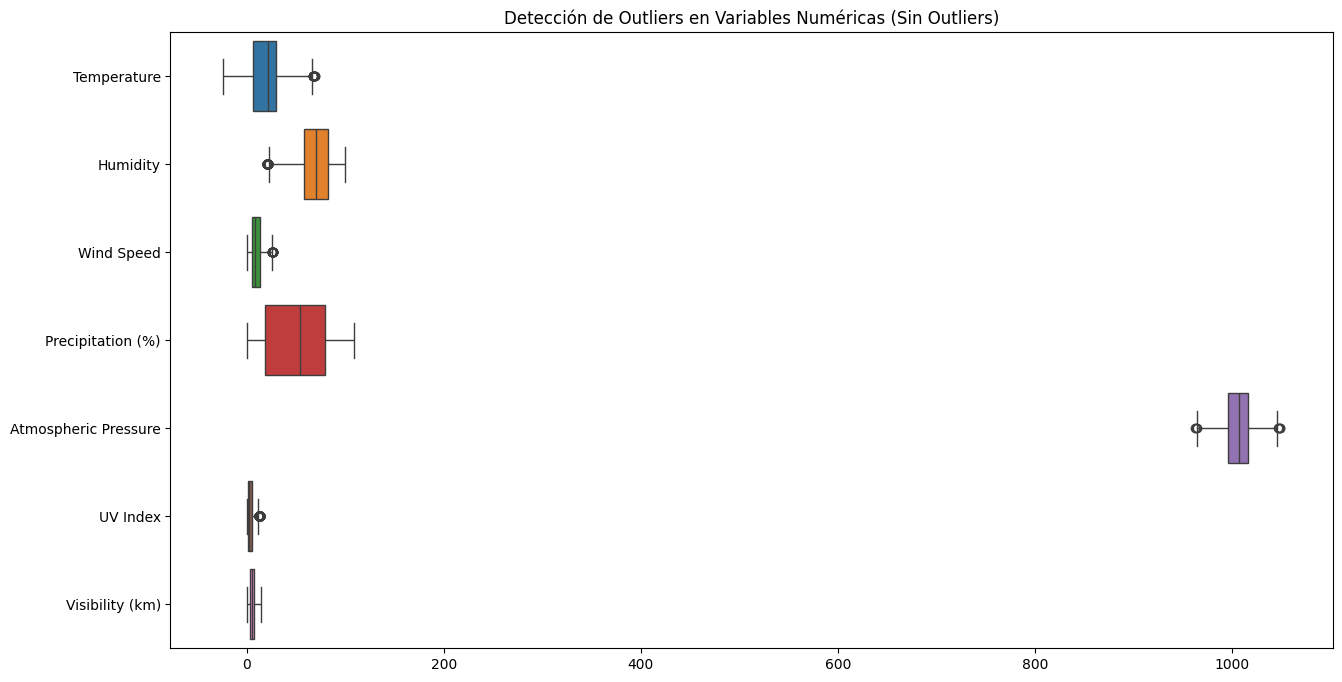

In [88]:

# Creamos boxplots para todas las columnas numéricas del DataFrame sin outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_sin_outliers.select_dtypes(include=[float, int]), orient='h')
plt.title("Detección de Outliers en Variables Numéricas (Sin Outliers)")
plt.show()

**EDA**

**Estudios por variables:**

En esta primera instancia vamos a dar un vistazo general a como está compuesta la base de datos y que cantidad de registros tiene cada estación.

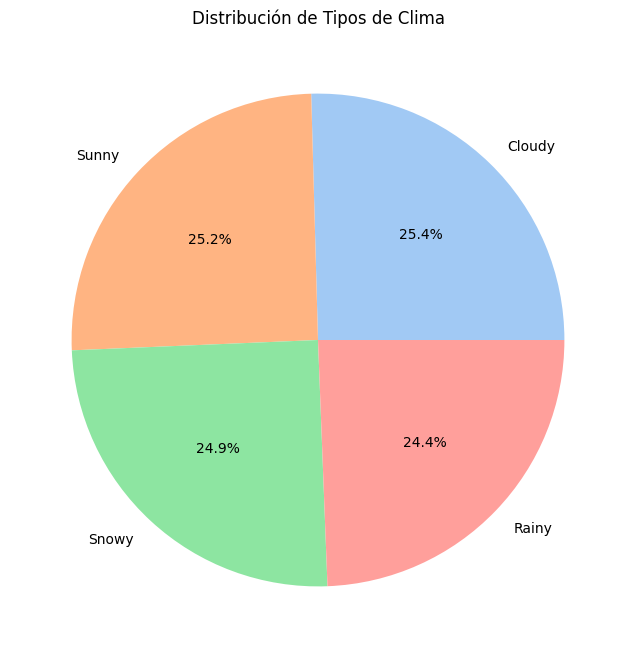

In [89]:
# Contamos la frecuencia de cada tipo de clima
weather_type_counts = df_sin_outliers['Weather Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(weather_type_counts, labels=weather_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribución de Tipos de Clima')
plt.show()

Luego de eso, es importante realizar un histograma de las variables numéricas para entender como están conformados los datos de forma rápida.

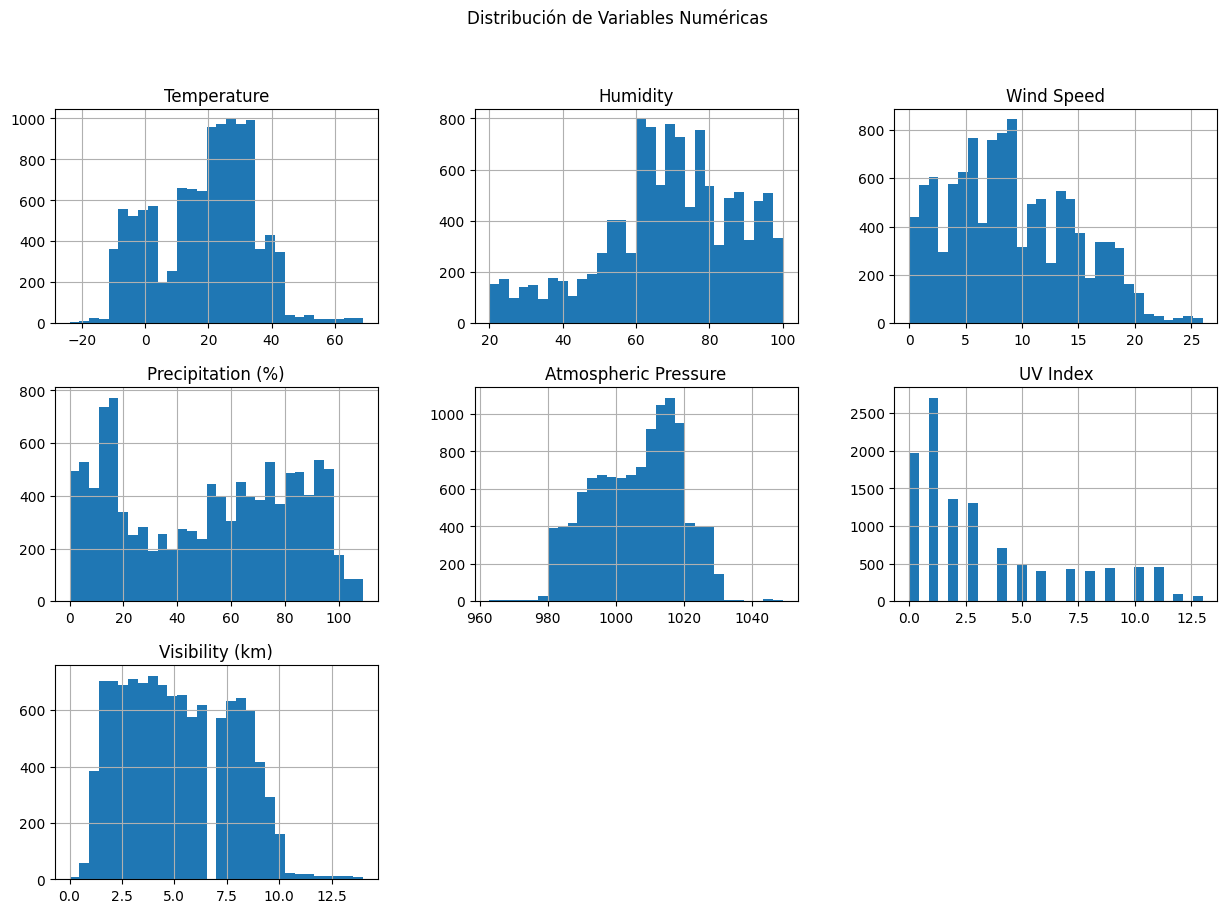

In [90]:
# Creamos histogramas para cada variable numérica
df_sin_outliers.select_dtypes(include=[float, int]).hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribución de Variables Numéricas")
plt.show()




En esta tercera instancia, vamos a realizar un gráfico que nos ayude a comprender como están distribuidos los tipos de clima por temporada.

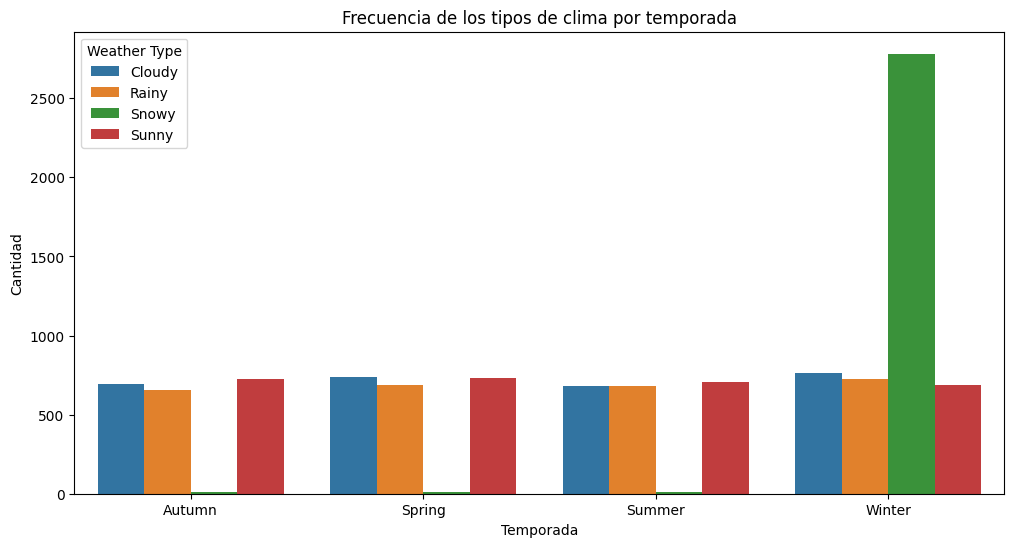

In [91]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sin_outliers, x='Season', hue='Weather Type')
plt.xlabel('Temporada')
plt.ylabel('Cantidad')
plt.title('Frecuencia de los tipos de clima por temporada')
plt.legend(title='Weather Type')
plt.show()

En este caso, vamos a mostrar los rangos de temperatura que poseen cada clima.

<ipython-input-92-85d8e8844245>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather Type', y='Temperature', data=df_sin_outliers, palette='muted')


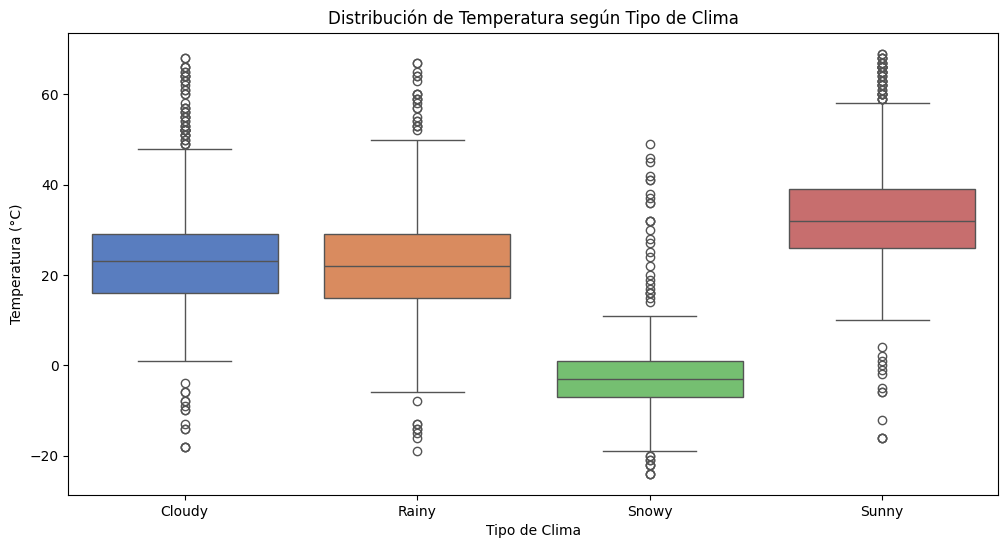

In [92]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Weather Type', y='Temperature', data=df_sin_outliers, palette='muted')

plt.title('Distribución de Temperatura según Tipo de Clima')
plt.xlabel('Tipo de Clima')
plt.ylabel('Temperatura (°C)')

plt.show()

Otro gráfico relevante, podemos observar como se distribuyen los tipos de clima teniendo en cuenta su ubicación.

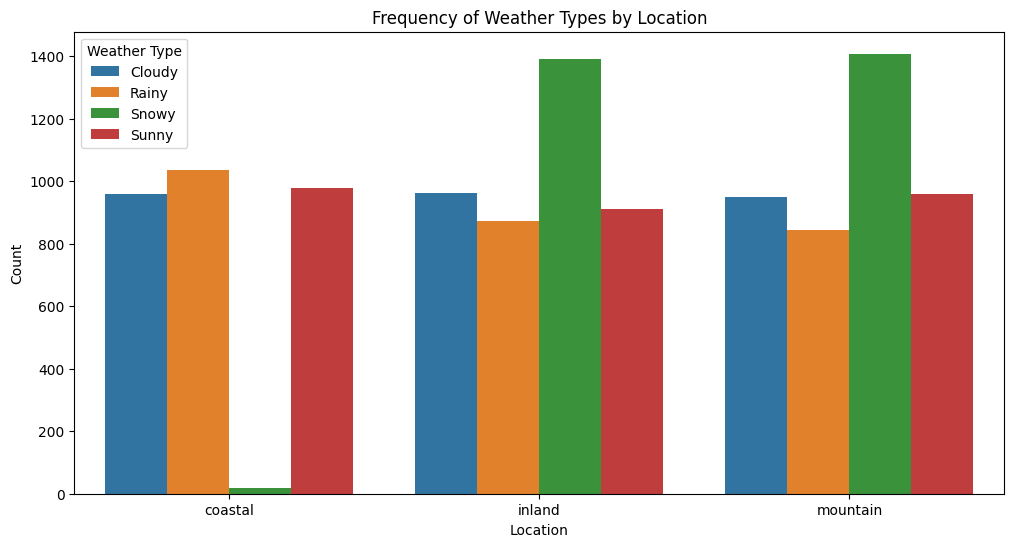

In [93]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sin_outliers, x='Location', hue='Weather Type')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Frequency of Weather Types by Location')
plt.legend(title='Weather Type')
plt.xticks(rotation=0)
plt.show()

Otro gráfico que puede resultar de interés es la relación entre humedad y los tipos de clima.

<ipython-input-94-42f951aa7b61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sin_outliers, x='Weather Type', y='Humidity', palette='muted')


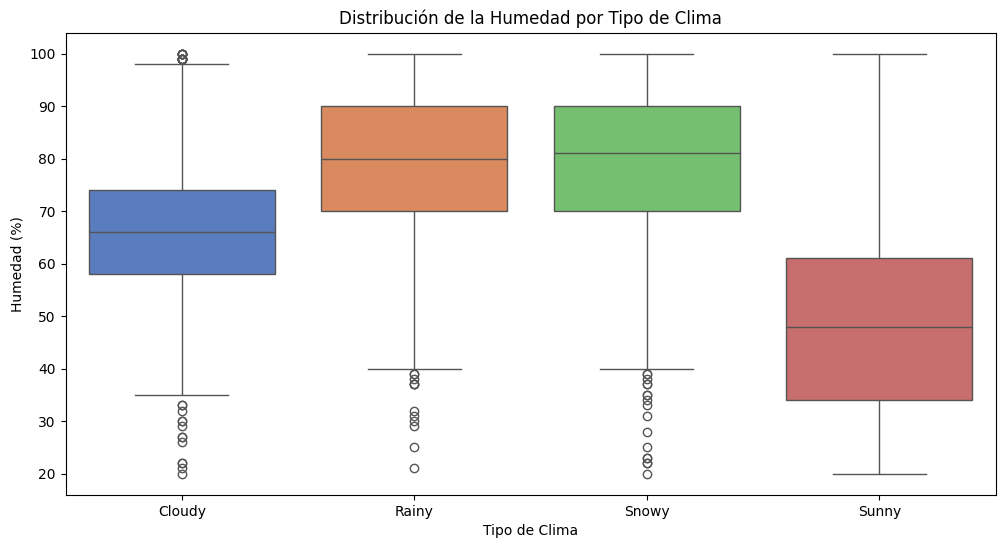

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sin_outliers, x='Weather Type', y='Humidity', palette='muted')
plt.title('Distribución de la Humedad por Tipo de Clima')
plt.xlabel('Tipo de Clima')
plt.ylabel('Humedad (%)')
plt.xticks(rotation=0)
plt.show()

Finalmente, podemos observar como se relacionan las diferentes variables a través de un mapa de calor.
Éste último puede ser de gran utilidad a la hora de profundizar en el análisis, ya que podemos observar en detalle la relevancia de cada una.

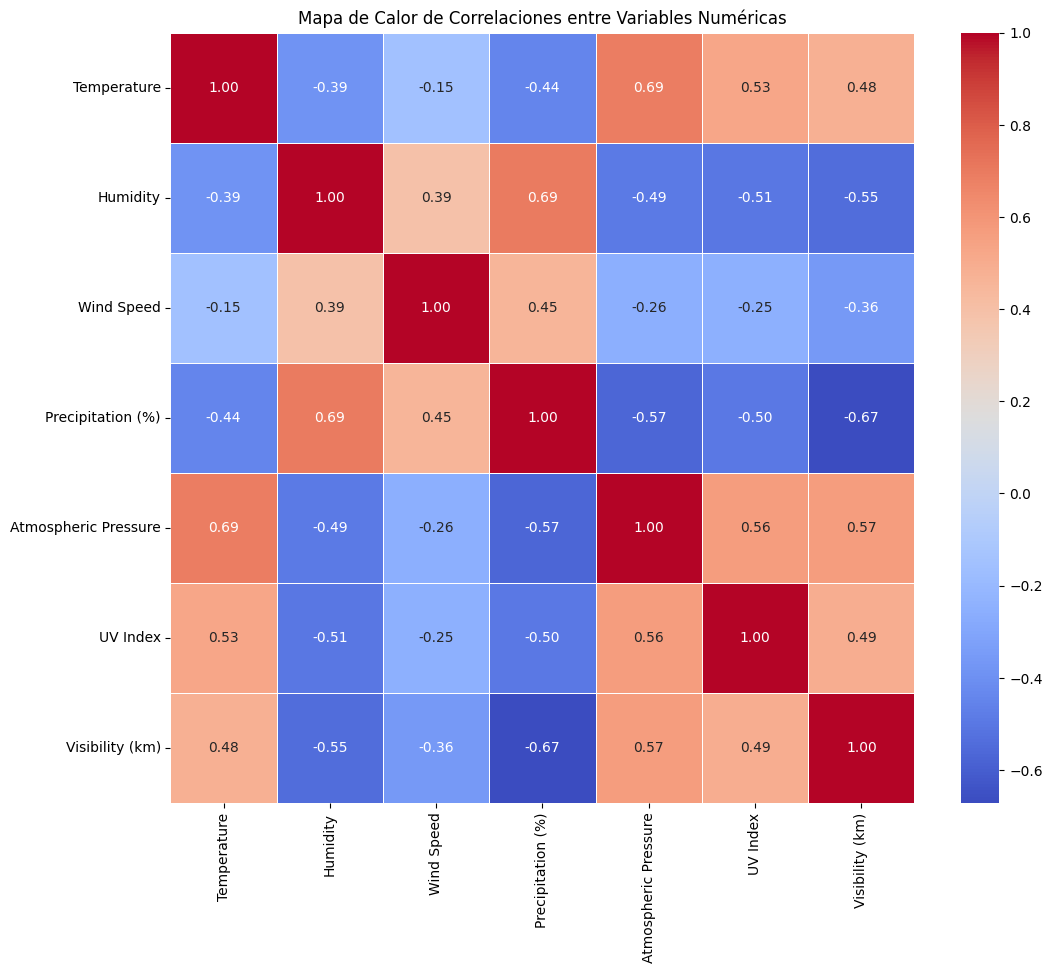

In [95]:
plt.figure(figsize=(12, 10))
corr_matrix = df_sin_outliers.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

**Conclusiones del Análisis Exploratorio de Datos (EDA):**


- Temperatura como Variable Clave: La Temperatura ha demostrado ser una de las variables más significativas para predecir el tipo de clima en el dataset.

- Tendencias en el Clima Nevado: El clima nevado se ha destacado en el análisis como uno de los tipos de clima con tendencias más marcadas.

**Preparación de los Datos:**

Después de realizar un análisis exploratorio detallado de los datos climáticos, nos preparamos para desarrollar un modelo predictivo utilizando técnicas de Machine Learning. Dado que el dataset de clima está compuesto por una combinación de variables numéricas y categóricas, nos centraremos en las siguientes estrategias:

**Modelos de Clasificación: Random Forest**

Utilizaremos Random Forest, un ensamble de árboles de decisión, para clasificar el tipo de clima (Rainy, Sunny, Cloudy, Snowy). Este modelo es adecuado para explorar relaciones complejas y no lineales entre las variables meteorológicas (como temperatura, humedad, velocidad del viento) y el tipo de clima. Aprovecharemos las características más relevantes identificadas durante el análisis exploratorio para entrenar el modelo y evaluar su desempeño en la clasificación del clima.

En el siguiente código, nos vamos a preparar para entrenar un modelo de Random Forest y visualizar cómo clasifica entre los diferentes tipos de clima

Exactitud del modelo: 0.97
Matriz de Confusión:
[[564  16   3   7]
 [  9 498   1   1]
 [  9   0 576   1]
 [  6   2   2 563]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Cloudy       0.96      0.96      0.96       590
       Rainy       0.97      0.98      0.97       509
       Snowy       0.99      0.98      0.99       586
       Sunny       0.98      0.98      0.98       573

    accuracy                           0.97      2258
   macro avg       0.97      0.97      0.97      2258
weighted avg       0.97      0.97      0.97      2258



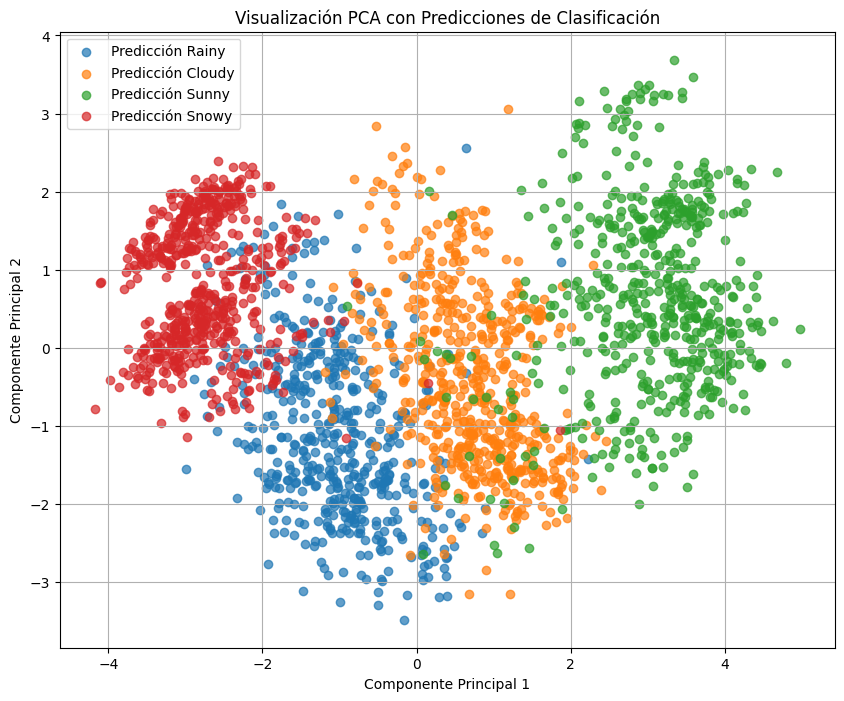

In [96]:

# Paso 1: Definimos las variables.
X = df_sin_outliers.drop('Weather Type', axis=1)  # Suponiendo que 'Weather Type' es la columna objetivo
y = df_sin_outliers['Weather Type']

# Luego dividimos los datos en entrenamiento y prueba, en este caso utilizamos un 80% para entrenamiento y 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos One-Hot Encoding a las variables categóricas en X_train y X_test.
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Controlamos que X_train_encoded y X_test_encoded tengan las mismas columnas después de codificar.
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Paso 2: Entrenamos el modelo Random Forest.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Paso 3: Evaluamos el modelo.
y_pred = rf_model.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# Métricas de evaluación.
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Aplicamos PCA para visualizar.
# Normalizamos los datos para PCA.
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded)

# Aplicamos PCA para reducir a 2 componentes principales.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# Agregamos resultados de predicción al DataFrame reducido por PCA.
df_pca = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Predicción'] = y_pred
df_pca['Actual'] = y_test.reset_index(drop=True)  # Aseguramos que el índice coincida

# Graficamos el resultado.
plt.figure(figsize=(10, 8))
classes = df_sin_outliers['Weather Type'].unique()
colors = {cl: plt.cm.tab10(i) for i, cl in enumerate(classes)}

for cl in classes:
    subset = df_pca[df_pca['Predicción'] == cl]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=f'Predicción {cl}', color=colors[cl], alpha=0.7)

plt.title('Visualización PCA con Predicciones de Clasificación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()



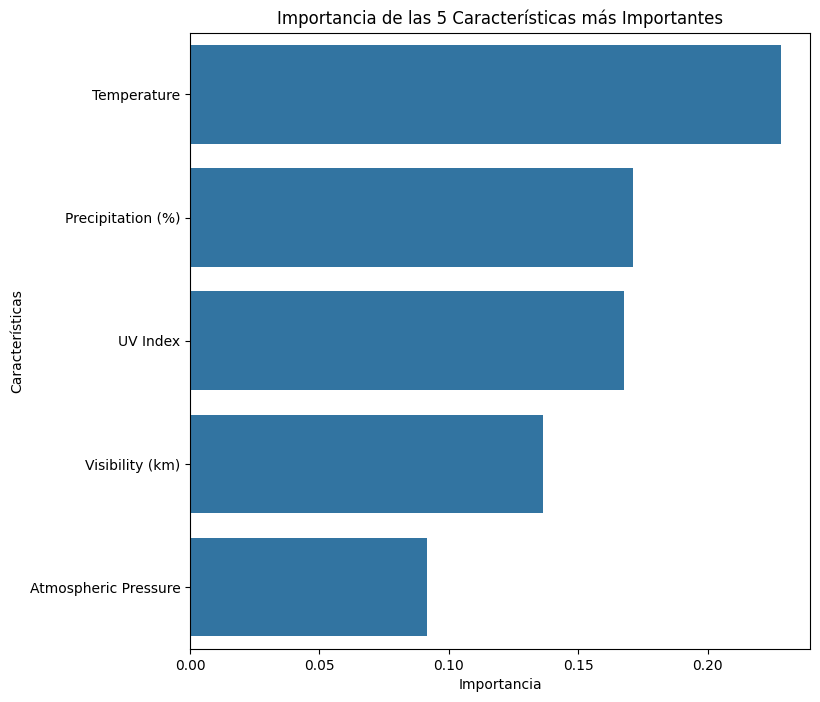

In [97]:
# Enumeramos los datos más determinantes a la hora de realizar la clasificación.
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(5)  # Obtener las 5 más importantes

plt.figure(figsize=(8, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importancia de las 5 Características más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


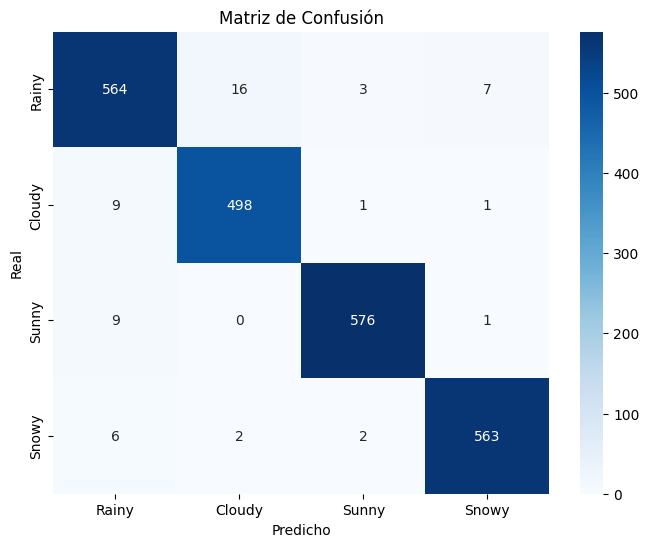

In [98]:

# Matriz de confusión visual
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


**Conclusión:**

Durante nuestro análisis del dataset de clima, exploramos diversas técnicas de aprendizaje automático para comprender mejor los patrones climáticos y predecir el tipo de clima basado en variables meteorológicas. A continuación, se presentan los aspectos más destacados y cómo abordamos cada uno:

**Descubrimiento de Patrones con Random Forest:**

Implementamos el modelo de Random Forest, un potente ensamble de árboles de decisión, para clasificar el tipo de clima en categorías como Nublado, Lluvioso, Nevado y Soleado. Este modelo nos permitió capturar las relaciones complejas y no lineales entre las características meteorológicas y el tipo de clima, proporcionando una alta precisión en la predicción.

**Optimización a través de Ingeniería de Características:**

Durante la fase de ingeniería de características, nos enfocamos en las variables más relevantes para la clasificación del clima: Temperatura, Precipitación, Índice UV, Visibilidad y Presión Atmosférica. Aplicamos técnicas de codificación y normalización para preparar los datos y asegurar que las características fueran comparables, lo que mejoró significativamente el rendimiento de nuestro modelo.

**Evaluación y Visualización:**

Evaluamos el modelo utilizando métricas como la exactitud, la matriz de confusión y el reporte de clasificación. Además, aplicamos PCA para reducir la dimensionalidad y visualizar cómo se agrupan los datos en función de las predicciones del modelo. Este enfoque nos permitió obtener una visión clara de la efectividad del modelo y cómo se comporta en diferentes condiciones climáticas.



*Para concluir, el análisis demostró que el modelo de Random Forest, combinado con una cuidadosa selección y preparación de características, proporcionó resultados precisos y útiles para la clasificación del clima. El dataset proporcionó una base sólida y bien estructurada, facilitando una exploración y análisis efectivos.*

